In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [0]:
data = pd.read_csv("black friday sample data.csv")

In [0]:
data.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [0]:
print(data.shape)

(537577, 12)


In [0]:
#checking for null values in different fields

print(type(data.isnull().sum()))

<class 'pandas.core.series.Series'>


In [0]:
m1 = data['Product_Category_2'].mean()
m2 = data['Product_Category_3'].mean()
print(m1,m2)

9.842144034798471 12.669840149015693


In [0]:
data['Product_Category_2'] = data['Product_Category_2'].fillna(m1)
data['Product_Category_3'] = data['Product_Category_3'].fillna(m2)
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,4.223872,2.279938,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,8.000000,12.669840,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.842144,12.669840,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,14.000000,12.669840,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [0]:
def scatter_plot(feature, target):
  plt.figure(figsize = (8,6))
  plt.scatter( data[feature],data[target], c = 'black')
  plt.xlabel("Independent variables - {}".format(feature))
  plt.ylabel("Purchase")
  plt.show()

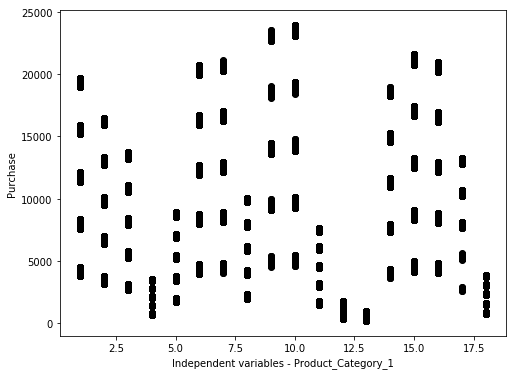

In [0]:
scatter_plot('Product_Category_1','Purchase')

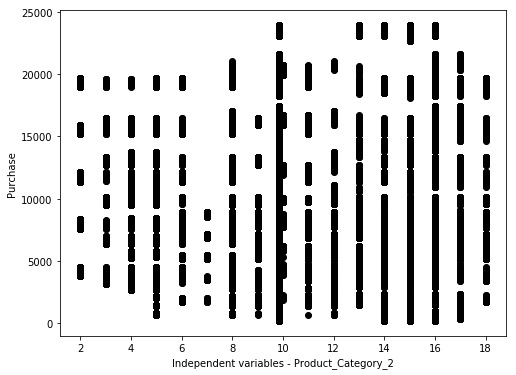

In [0]:
scatter_plot('Product_Category_2','Purchase')

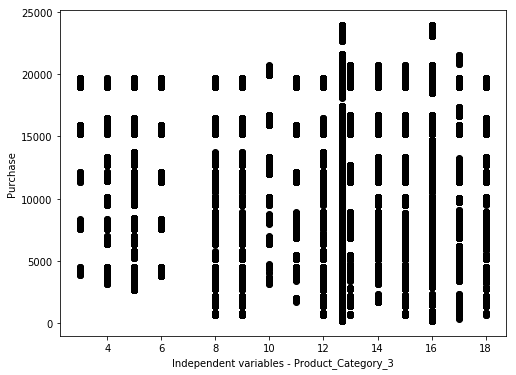

In [0]:
scatter_plot('Product_Category_3','Purchase')

In [0]:
x = data.iloc[:,0:11]

In [0]:
#All the values have been converted into numerical values
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
x =x.apply(l.fit_transform)

In [0]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
fs = StandardScaler()
x = fs.fit_transform(x)
#print(type(x))
y = data['Purchase']

In [0]:
#Accuracy without PCA
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=2, test_size = 0.20)
d = model_selection(x_train,x_test,y_train,y_test)
d = sorted(d.items(), key=lambda x: x[1], reverse=True)

for i in d:
  print(i)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy Score of Linear regression on train set 11.707294023800053
Accuracy Score of Decision Tree on train set 100.0
Accuracy Score of Random Forests on train set 94.19491152198745
Accuracy Score of Gradient Boosting on train set 65.46317593405051
Accuracy Score of Ridge Regression on train set 11.707294023799953



Accuracy Score of Linear regression on test set 12.107297024124474
Accuracy Score of Decision Tree on test set 42.317373726899376
Accuracy Score of Random Forests on test set 67.07919906508904
Accuracy Score of Gradient Boosting on testset 65.30424183678613
Accuracy Score of Ridge Regression on test set 12.107296985605553



('Random_Forests', 67.07919906508904)
('Gradient_Boosting', 65.30424183678613)
('Decision_Tree', 42.317373726899376)
('Linear_regression', 12.107297024124474)
('Ridge_Regression', 12.107296985605553)


In [0]:
#Dimensionality Reduction
from sklearn.decomposition import PCA
pc = PCA(4)
components = pc.fit_transform(x)
#components

In [0]:
df = pd.DataFrame(data = components, columns = ["component 1", "component 2", "component 3", "component 4"])

In [0]:
dataset = pd.concat([df, data[['Purchase']]], axis = 1)

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge

d = {}

def model_selection(X_train,X_test,y_train,y_test):
  d = {}
  lr = LinearRegression()
  dtr = DecisionTreeRegressor()
  rfr = RandomForestRegressor()
  gbr = GradientBoostingRegressor()
  ply = PolynomialFeatures()
  rr = Ridge(alpha=0.05)
  
  fit1 = lr.fit(X_train,y_train)
  fit2 = dtr.fit(X_train,y_train)
  fit3 = rfr.fit(X_train,y_train)
  fit4 = gbr.fit(X_train,y_train)
  fit5 = rr.fit(X_train,y_train)
  
  
  print("Accuracy Score of Linear regression on train set",fit1.score(X_train,y_train)*100)
  print("Accuracy Score of Decision Tree on train set",fit2.score(X_train,y_train)*100)
  print("Accuracy Score of Random Forests on train set",fit3.score(X_train,y_train)*100)
  print("Accuracy Score of Gradient Boosting on train set",fit4.score(X_train,y_train)*100)
  print("Accuracy Score of Ridge Regression on train set",fit5.score(X_train,y_train)*100)
  print('\n\n')
  
  print("Accuracy Score of Linear regression on test set",fit1.score(X_test,y_test)*100)
  d.update( Linear_regression = fit1.score(x_test,y_test)*100)
  print("Accuracy Score of Decision Tree on test set",fit2.score(X_test,y_test)*100)
  d.update( Decision_Tree = fit2.score(x_test,y_test)*100)
  print("Accuracy Score of Random Forests on test set",fit3.score(X_test,y_test)*100)
  d.update(  Random_Forests = fit3.score(x_test,y_test)*100)
  print("Accuracy Score of Gradient Boosting on testset",fit4.score(X_test,y_test)*100)
  d.update( Gradient_Boosting = fit4.score(x_test,y_test)*100)
  print("Accuracy Score of Ridge Regression on test set",fit5.score(X_test,y_test)*100)
  d.update( Ridge_Regression = fit5.score(x_test,y_test)*100)
  print('\n\n')
  
  return d
  

In [0]:
#Accuracy with PCA
x_d = dataset.iloc[:,0:4]
y_d = dataset['Purchase']
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x_d, y_d, random_state=2, test_size = 0.20)
d = model_selection(x_train,x_test,y_train,y_test)
d = sorted(d.items(), key=lambda x: x[1], reverse=True)

for i in d:
  print(i)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy Score of Linear regression on train set 8.573379605911269
Accuracy Score of Decision Tree on train set 100.0
Accuracy Score of Random Forests on train set 85.69339003559465
Accuracy Score of Gradient Boosting on train set 12.301941637836245
Accuracy Score of Ridge Regression on train set 8.57337960591117



Accuracy Score of Linear regression on test set 8.841835622643423
Accuracy Score of Decision Tree on test set -39.90929492398148
Accuracy Score of Random Forests on test set 19.18658326010756
Accuracy Score of Gradient Boosting on testset 12.238762169080196
Accuracy Score of Ridge Regression on test set 8.841835605886128



('Random_Forests', 19.18658326010756)
('Gradient_Boosting', 12.238762169080196)
('Linear_regression', 8.841835622643423)
('Ridge_Regression', 8.841835605886128)
('Decision_Tree', -39.90929492398148)
